In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/new data set.csv')

In [ ]:
print(df.head())
print(df.info())

     Dish Name   Country Region/City Cooking Method  Typical Price (USD)  \
0     Takoyaki     Japan       Osaka          Fried                 3.28   
1     Vada Pav     India      Mumbai          Fried                 2.37   
2  Funnel Cake       USA       Texas          Fried                 2.78   
3   Kathi Roll     India     Kolkata        Grilled                 1.89   
4     Pad Thai  Thailand     Bangkok     Stir-Fried                 3.48   

  Vegetarian  
0         No  
1        Yes  
2        Yes  
3         No  
4        Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Cooking Method       4500 non-null   object 
 4   Typical Price (USD)  4500 non-null   float

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop('Typical Price (USD)', axis=1)
y = df['Typical Price (USD)']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

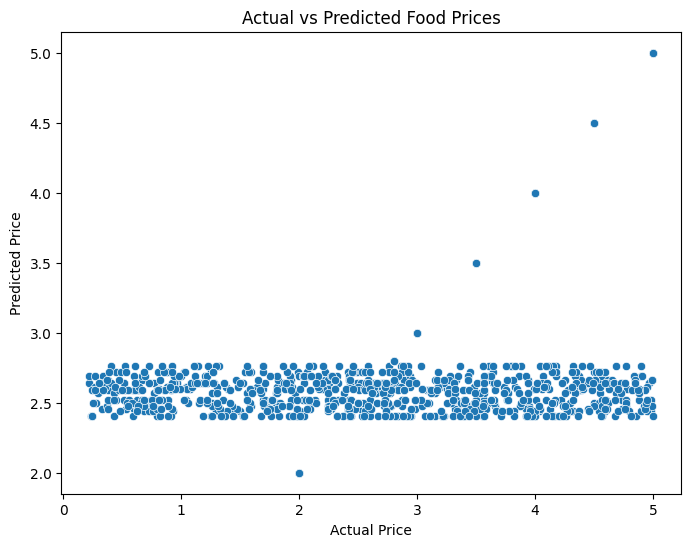

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Food Prices")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.0312771959389289
Mean Squared Error (MSE): 1.6494078373019354
Root Mean Squared Error (RMSE): 1.284292738164448
R² Score: 0.08993759858831885
